Saving training.csv to training (3).csv

 Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23719 entries, 0 to 23718
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               23719 non-null  object 
 1   home_team          23719 non-null  object 
 2   away_team          23719 non-null  object 
 3   home_score         23719 non-null  int64  
 4   away_score         23719 non-null  int64  
 5   home_team_victory  23719 non-null  bool   
 6   draw               23719 non-null  bool   
 7   tournament_name    23719 non-null  object 
 8   city               23719 non-null  object 
 9   country            23719 non-null  object 
 10  neutral            23719 non-null  bool   
 11  scoring_team       22696 non-null  object 
 12  scoring_player     22696 non-null  object 
 13  minute             22592 non-null  float64
 14  own_goal           22696 non-null  object 
 15  penalty  

<ipython-input-4-3535a30136f7>:34: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])  # Mode for categorical
<ipython-input-4-3535a30136f7>:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y, y=df["goal_diff"], palette="coolwarm")



 Feature Engineering Completed.

 Model Performance Metrics:
✔ Test Set Accuracy: 0.5409
✔ ROC AUC Score: 0.4597
✔ Confusion Matrix:
 [[ 160 1893]
 [ 285 2406]]


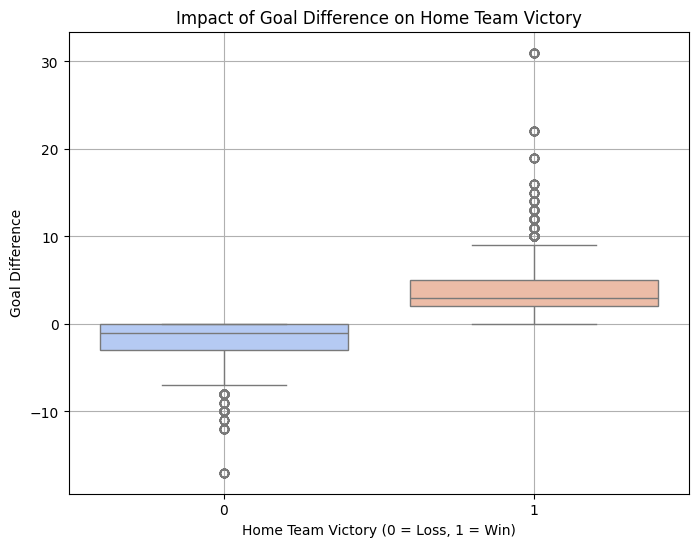

In [ ]:
#  Google Colab: Upload Local Files
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

#  Upload dataset
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

#  Display dataset info
print("\n Dataset Overview:\n")
print(df.info())  # Show data types & missing values
print("\n First few rows of the dataset:\n")
print(df.head())

# ---  DATA CLEANING ---
#  Convert 'date' column to datetime format (if exists)
if "date" in df.columns:
    df["date"] = pd.to_datetime(df["date"], errors="coerce")

#  Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

#  Fill missing values: Numeric with mean, Categorical with mode
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])  # Mode for categorical
    else:
        df[col] = df[col].fillna(df[col].mean())  # Mean for numeric

#  Ensure 'home_team_victory' is binary (0 or 1)
df["home_team_victory"] = df["home_team_victory"].astype(int)

print("\n Data cleaning completed.")

# ---  FEATURE ENGINEERING ---
df["goal_diff"] = df["home_score"] - df["away_score"]  # Goal difference feature
df["score_interaction"] = df["home_score"] * df["away_score"]  # Interaction term

#  Convert categorical variables to numeric using Label Encoding
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

print("\n Feature Engineering Completed.")

# ---  MODEL TRAINING (LOGISTIC REGRESSION) ---
#  Define features (X) and target (y)
X = df.drop(columns=["home_team_victory"])  # Features
y = df["home_team_victory"]  # Target variable

#  Ensure all features are numeric
X = X.apply(pd.to_numeric, errors='coerce').fillna(0)

#  Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#  Train Logistic Regression Model (FASTER METHOD)
logit_model = LogisticRegression(solver='liblinear', max_iter=300, penalty='l2')
logit_model.fit(X_train, y_train)

#  Predict on Test Set
y_pred_class = logit_model.predict(X_test)
y_pred_prob = logit_model.predict_proba(X_test)[:, 1]  # Get probability scores

# ---  MODEL EVALUATION ---
accuracy = accuracy_score(y_test, y_pred_class)
roc_auc = roc_auc_score(y_test, y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred_class)

print("\n Model Performance Metrics:")
print(f"✔ Test Set Accuracy: {accuracy:.4f}")
print(f"✔ ROC AUC Score: {roc_auc:.4f}")
print("✔ Confusion Matrix:\n", conf_matrix)

# ---  VISUALIZATION ---
plt.figure(figsize=(8, 6))
sns.boxplot(x=y, y=df["goal_diff"], palette="coolwarm")
plt.xlabel("Home Team Victory (0 = Loss, 1 = Win)")
plt.ylabel("Goal Difference")
plt.title("Impact of Goal Difference on Home Team Victory")
plt.grid(True)
plt.show()

Saving training.csv to training (2).csv

 Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23719 entries, 0 to 23718
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               23719 non-null  object 
 1   home_team          23719 non-null  object 
 2   away_team          23719 non-null  object 
 3   home_score         23719 non-null  int64  
 4   away_score         23719 non-null  int64  
 5   home_team_victory  23719 non-null  bool   
 6   draw               23719 non-null  bool   
 7   tournament_name    23719 non-null  object 
 8   city               23719 non-null  object 
 9   country            23719 non-null  object 
 10  neutral            23719 non-null  bool   
 11  scoring_team       22696 non-null  object 
 12  scoring_player     22696 non-null  object 
 13  minute             22592 non-null  float64
 14  own_goal           22696 non-null  object 
 15  penalty  

<ipython-input-3-651b4f836ad3>:43: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)



 Features retained after VIF filtering: ['minute', 'score_interaction']
Optimization terminated successfully.
         Current function value: 0.683204
         Iterations 4

 Model Summary:
                           Logit Regression Results                           
Dep. Variable:      home_team_victory   No. Observations:                18975
Model:                          Logit   Df Residuals:                    18972
Method:                           MLE   Df Model:                            2
Date:                Mon, 10 Feb 2025   Pseudo R-squ.:                0.001326
Time:                        03:05:33   Log-Likelihood:                -12964.
converged:                       True   LL-Null:                       -12981.
Covariance Type:            nonrobust   LLR p-value:                 3.350e-08
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
cons

<ipython-input-3-651b4f836ad3>:141: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="home_team_victory", y="goal_diff", data=df, palette="coolwarm")


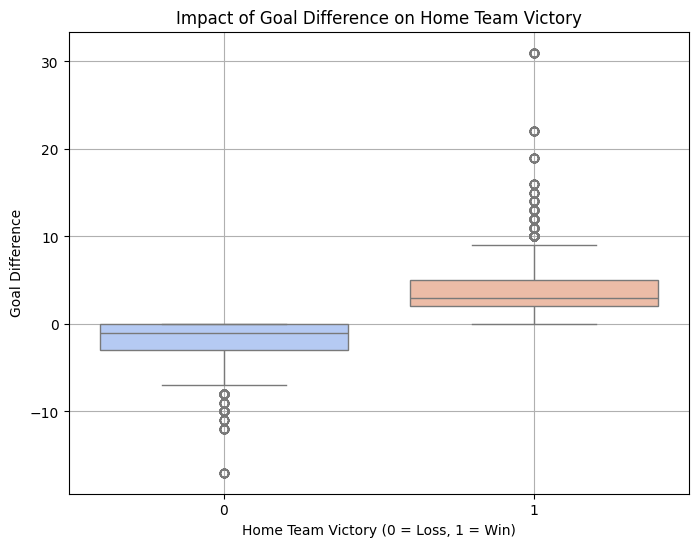

In [ ]:
#  GOOGLE COLAB: Upload Local Files
!pip install statsmodels seaborn  # Ensure required packages are installed

#  Import Libraries
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm  # Import for logistic regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Import VIF

#  Upload dataset from local machine
uploaded = files.upload()

#  Load dataset
filename = list(uploaded.keys())[0]  # Get uploaded file name
df = pd.read_csv(filename)  # Load the CSV file

#  Display dataset info
print("\n Dataset Overview:\n")
print(df.info())  # Display column data types and missing values
print("\n First few rows of the dataset:\n")
print(df.head())  # Show first few rows

# ---  DATA CLEANING ---
# Convert 'date' column to datetime format if it exists
if "date" in df.columns:
    df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill missing numeric values with mean
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill missing categorical values with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Ensure 'home_team_victory' is binary (0 or 1)
df["home_team_victory"] = df["home_team_victory"].astype(int)

print("\n Data cleaned and missing values handled.\n")

# ---  FEATURE ENGINEERING ---
df["goal_diff"] = df["home_score"] - df["away_score"]  # Goal difference feature
df["score_interaction"] = df["home_score"] * df["away_score"]  # Interaction term

# Convert categorical variables to numeric using One-Hot Encoding
df = pd.get_dummies(
    df, columns=["tournament_name", "home_team", "away_team"], drop_first=True
)

# Rename 'date' column to avoid conflicts
if "date" in df.columns:
    df.rename(columns={"date": "match_date"}, inplace=True)

print("\n Feature Engineering Completed!")

# ---  MODEL TRAINING (Logistic Regression) ---
# Define independent (X) and dependent (y) variables
X = df.drop(columns=["home_team_victory"])  # Features
y = df["home_team_victory"]  # Target variable

#  Address Multicollinearity using VIF
def calculate_vif(X):
    X_numeric = X.select_dtypes(include=np.number)  # Select only numeric features
    if X_numeric.shape[1] == 0:  # Safety check
        print("\n⚠️ No numeric features available for VIF calculation!")
        return pd.DataFrame(columns=["feature", "VIF"])

    vif_data = pd.DataFrame()
    vif_data["feature"] = X_numeric.columns
    vif_data["VIF"] = [
        variance_inflation_factor(X_numeric.values, i) for i in range(X_numeric.shape[1])
    ]
    return vif_data

#  Compute VIF and filter features (VIF > 5 suggests collinearity)
vif_data = calculate_vif(X)

if not vif_data.empty:  # Ensure VIF data is valid
    features_to_keep = vif_data[vif_data["VIF"] <= 5]["feature"].tolist()
    if len(features_to_keep) > 0:
        X = X[features_to_keep]
        print("\n Features retained after VIF filtering:", features_to_keep)
    else:
        print("\n Warning: All features were removed due to high VIF! Using original set.")
else:
    print("\n No valid numeric features detected. Skipping VIF filtering.")

#  Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#  Check for NaN values in training data before fitting
if X_train.isnull().sum().sum() > 0:
    print("\n ERROR: NaN values detected in training data! Fixing...")
    X_train.fillna(X_train.mean(), inplace=True)
    X_test.fillna(X_test.mean(), inplace=True)

# ---  Fit the Logistic Regression Model ---
#  Add a constant to the independent variables (required for statsmodels)
X_train_const = sm.add_constant(X_train)

#  Train the logistic regression model
logit_model = sm.Logit(y_train, X_train_const)
logit_results = logit_model.fit()

#  Display Model Summary
print("\n Model Summary:")
print(logit_results.summary())

#  Print AIC score (goal is to minimize this)
print("\n AIC Score:", logit_results.aic)

# ---  MODEL EVALUATION ---
# Predict on Test Set
X_test_const = sm.add_constant(X_test)
y_pred_prob = logit_results.predict(X_test_const)
y_pred_class = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary

#  Evaluate Performance
accuracy = accuracy_score(y_test, y_pred_class)
conf_matrix = confusion_matrix(y_test, y_pred_class)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("\n Model Performance Metrics:")
print(f"✔ Test Set Accuracy: {accuracy:.4f}")
print(f"✔ ROC AUC Score: {roc_auc:.4f}")
print("✔ Confusion Matrix:\n", conf_matrix)

# ---  VISUALIZATION ---
plt.figure(figsize=(8, 6))
sns.boxplot(x="home_team_victory", y="goal_diff", data=df, palette="coolwarm")
plt.xlabel("Home Team Victory (0 = Loss, 1 = Win)")
plt.ylabel("Goal Difference")
plt.title("Impact of Goal Difference on Home Team Victory")
plt.grid(True)
plt.show()

  Using cached numpy-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)


Saving training.csv to training (9).csv

 Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23719 entries, 0 to 23718
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               23719 non-null  object 
 1   home_team          23719 non-null  object 
 2   away_team          23719 non-null  object 
 3   home_score         23719 non-null  int64  
 4   away_score         23719 non-null  int64  
 5   home_team_victory  23719 non-null  bool   
 6   draw               23719 non-null  bool   
 7   tournament_name    23719 non-null  object 
 8   city               23719 non-null  object 
 9   country            23719 non-null  object 
 10  neutral            23719 non-null  bool   
 11  scoring_team       22696 non-null  object 
 12  scoring_player     22696 non-null  object 
 13  minute             22592 non-null  float64
 14  own_goal           22696 non-null  object 
 15  penalty  

<ipython-input-11-19dfc3d8873b>:42: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])



 Final Column Names for Model:
Index(['home_score', 'away_score', 'draw', 'neutral', 'own_goal', 'penalty',
       'shootout_required', 'first_shooter', 'winner', 'home_team_Albania',
       ...
       'away_team_Vanuatu', 'away_team_Venezuela', 'away_team_Vietnam',
       'away_team_Vietnam Republic', 'away_team_Wales', 'away_team_Yemen',
       'away_team_Yemen DPR', 'away_team_Yugoslavia', 'away_team_Zambia',
       'away_team_Zimbabwe'],
      dtype='object', length=441)


/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)



 GLM Model Summary:
                 Generalized Linear Model Regression Results                  
Dep. Variable:      home_team_victory   No. Observations:                23719
Model:                            GLM   Df Residuals:                    23266
Model Family:                Binomial   Df Model:                          452
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.3068e-09
Date:                Thu, 13 Feb 2025   Deviance:                   2.6137e-09
Time:                        22:11:08   Pearson chi2:                 1.31e-09
No. Iterations:                    31   Pseudo R-squ. (CS):             0.7454
Covariance Type:            nonrobust                                         
                                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------

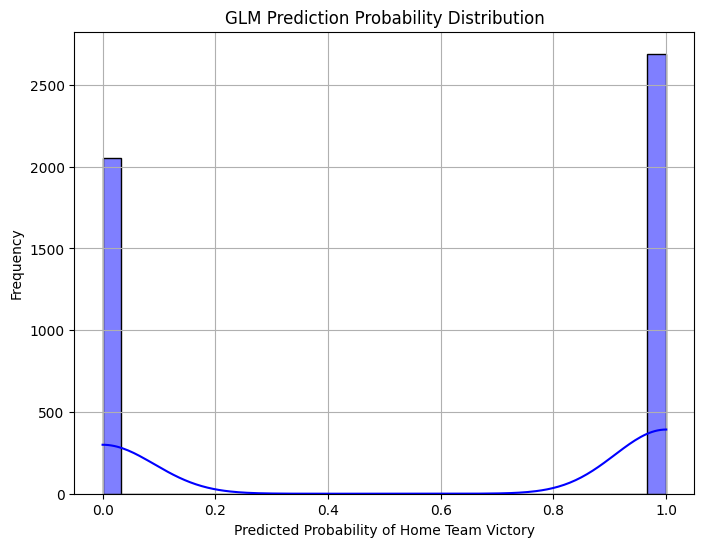

In [11]:
#  Install Dependencies (if needed)
!pip install --upgrade statsmodels seaborn scikit-learn pandas numpy matplotlib

#  Import Required Libraries
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

#  Upload dataset
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

#  Display dataset info
print("\n Dataset Overview:\n")
print(df.info())
print("\n First few rows:\n")
print(df.head())

# ---  DATA CLEANING ---
if "date" in df.columns:
    df["date"] = pd.to_datetime(df["date"], errors="coerce")  # Convert to datetime

df.replace([np.inf, -np.inf], np.nan, inplace=True)  # Handle infinite values

#  Fix `FutureWarning` for `.fillna()`
df = df.infer_objects(copy=False)

# Fill missing numeric values with mean
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill missing categorical values with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

df["home_team_victory"] = df["home_team_victory"].astype(int)  # Ensure binary target variable

#  Fix Column Names: Replace spaces & special characters for Patsy formula compatibility
df.columns = df.columns.str.replace(r'[^a-zA-Z0-9_]', '_', regex=True)

#  Drop non-useful columns (e.g., "date", "city", "country", "scoring_player")
columns_to_drop = ["date", "city", "country", "scoring_player", "scoring_team", "minute"]
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

#  Convert categorical variables to dummies
df = pd.get_dummies(df, columns=["tournament_name", "home_team", "away_team"], drop_first=True)

# ---  DEFINE FEATURES & TARGET ---
X = df.drop(columns=["home_team_victory"])
y = df["home_team_victory"]

#  Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#  Double-check column names to avoid Patsy formula syntax errors
print("\n Final Column Names for Model:")
print(X_train.columns)

# ---  TRAIN GLM MODEL ---
#  Ensure all column names are properly enclosed in Q() to avoid syntax errors
glm_formula = "home_team_victory ~ " + " + ".join([f"Q('{col}')" for col in X_train.columns])

glm_model = smf.glm(formula=glm_formula,
                     data=df,
                     family=sm.families.Binomial()).fit()

#  Display GLM Model Summary
print("\n GLM Model Summary:")
print(glm_model.summary())

#  Predict with GLM Model
y_pred_glm_prob = glm_model.predict(X_test)
y_pred_glm_class = (y_pred_glm_prob > 0.5).astype(int)

#  Evaluate GLM Model
glm_accuracy = accuracy_score(y_test, y_pred_glm_class)
glm_roc_auc = roc_auc_score(y_test, y_pred_glm_prob)
glm_conf_matrix = confusion_matrix(y_test, y_pred_glm_class)

print("\n GLM Model Performance:")
print(f"✔ Accuracy: {glm_accuracy:.4f}")
print(f"✔ ROC AUC: {glm_roc_auc:.4f}")
print("✔ Confusion Matrix:\n", glm_conf_matrix)

# ---  GLM Visualization ---
plt.figure(figsize=(8, 6))
sns.histplot(y_pred_glm_prob, kde=True, bins=30, color="blue")
plt.xlabel("Predicted Probability of Home Team Victory")
plt.ylabel("Frequency")
plt.title("GLM Prediction Probability Distribution")
plt.grid(True)
plt.show()